# MAKE SURE YOU PULL THE DATA FILES FROM TEAMS BEFORE YOU START PLAYING AROUND IN HERE.

We are using oracle-cards-20250127220801.json

Our repo has the data folder in the .gitignore so we don't clutter up the GitHub repo.

In [ ]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn
import numpy as np

# REGEX
import re
# Natural Language Toolkit
import nltk


# Probably don't need these two yet...
# import scipy as sp
# import torch


In [2]:
# Checking to make sure torch installed correctly if I ever need it for something
# Get current device info
if torch.cuda.is_available():
    device = torch.cuda.get_device_name(0)  # 0 is typically the first GPU
    print(f"Current GPU: {device}")
    print(f"torch.version.cuda: {torch.version.cuda}")
else:
    print("No GPU available, using CPU")


Current GPU: NVIDIA GeForce GTX 1070
torch.version.cuda: 11.8


# Read Data

In [14]:
data = pd.read_json('../data/external/oracle-cards-20250127220801.json')

In [15]:
data.columns

Index(['object', 'id', 'oracle_id', 'multiverse_ids', 'cardmarket_id', 'name',
       'lang', 'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_status', 'image_uris', 'mana_cost', 'cmc', 'type_line',
       'oracle_text', 'power', 'toughness', 'colors', 'color_identity',
       'keywords', 'legalities', 'games', 'reserved', 'foil', 'nonfoil',
       'finishes', 'oversized', 'promo', 'reprint', 'variation', 'set_id',
       'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri',
       'scryfall_set_uri', 'rulings_uri', 'prints_search_uri',
       'collector_number', 'digital', 'rarity', 'watermark', 'flavor_text',
       'card_back_id', 'artist', 'artist_ids', 'illustration_id',
       'border_color', 'frame', 'frame_effects', 'security_stamp', 'full_art',
       'textless', 'booster', 'story_spotlight', 'preview', 'prices',
       'related_uris', 'purchase_uris', 'mtgo_id', 'mtgo_foil_id',
       'tcgplayer_id', 'edhrec_rank', 'penny_rank', 'arena_id',

## Down select columns from data

In [16]:
data.set.unique()

array(['drc', '7ed', 'm14', 'c19', '9ed', 'ymkm', 'ulg', 'war', 'woe',
       'scg', 'me1', 'otc', 'ody', 'arb', 'jmp', 'xln', 'vma', 'da1',
       'c13', 'm20', 'hou', 'me3', 'znc', '10e', '5ed', 'und', 'moc',
       'afdn', 'zen', 'shm', 'mm2', 't40k', 'aone', 'me4', 'tinr', 'apc',
       'snc', 'ust', 'gs1', 'mkm', 'afc', 'aneo', 'lcc', 'por', 'rix',
       'inv', 'iko', 'twoc', 'frf', 'nec', 'm12', 'dom', 'clb', 'ltr',
       'cn2', 'astx', 'one', 's99', 'emn', 'khm', 'lgn', 'akh', 'dmc',
       'lrw', 'aer', 'neo', 'cns', 'mh3', 'td2', 'eld', 'acr', 'a25',
       'rav', 'mh2', 'p02', 'ths', 'tcmm', 'm19', 'avr', 'j22', 'dsk',
       'mb2', 'afr', 'ktk', 'mkc', 'fdn', 'blb', 'rvr', 'fj25', 'bro',
       'isd', 'dst', 'clu', 'mbs', 'c16', 'm15', 'aafr', 'otj', 'wwk',
       'tmp', 'mh1', 'bfz', 'j21', 'm3c', 'pca', 'nem', 'cmm', 'abro',
       'asnc', 'ala', 'mir', 'e01', 'stx', '40k', 'jou', 'jud', 'thb',
       'avow', 'mrd', 'fem', 'unf', 'm13', 'pls', 'totc', 'dmu', 'lci',
     

In [17]:
# Create new dataframe with selected columns and filter out reprints
selected_df = data[['name', 'mana_cost', 'type_line', 'oracle_text', 'power', 'toughness', 'colors', 'keywords', 'mtgo_id', 'loyalty', 'defense']]

In [18]:
selected_df

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,[G],[Landfall],NaN,NaN,NaN
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,[U],[Enchant],49283.0,NaN,NaN
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,[G],[Entwine],77122.0,NaN,NaN
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,[U],[Flying],22609.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33826,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
33827,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
33828,"Toralf, God of Fury // Toralf's Hammer",NaN,Legendary Creature — God // Legendary Artifact...,NaN,NaN,NaN,NaN,"[Trample, Equip]",87643.0,NaN,NaN
33829,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN


In [19]:
# What are all of the unique keywords in the dataset?
unique_keywords = list(set([keyword for keywords in data['keywords']for keyword in keywords]))
unique_keywords

['Elite Troops',
 'Stall for Time',
 'Teamwork',
 'Hexproof',
 'Go to Sleep',
 'Emerge',
 'Sweep',
 'Unearthly Power',
 'Enchant',
 'Pick a Perk',
 'Prototype',
 'Strategic Coordinator',
 'The Betrayer',
 'Daybound',
 'Mark of Chaos Ascendant',
 "It's Probably Nothing",
 'Allons-y!',
 'Bushido',
 'Revolt',
 'Sorcerous Elixir',
 'Fire of Tzeentch',
 'Roll to Visit Your Attractions',
 'Clash',
 'First strike',
 'Buffet',
 'Locus of Slaanesh',
 'Mirran Victory',
 'Bolster',
 'Psychic Abomination',
 'Splice',
 'Legendary landwalk',
 'Enlist',
 'Battle Cry',
 'Master Tactician',
 'Rogue Trader',
 'Wild Card',
 'Surveil',
 'Unrivaled Lethality',
 'The Will of the Hive Mind',
 'Scry',
 'That Could Actually Be Dangerous',
 'Stew',
 'Wraith Form',
 'Magecraft',
 'Sort Inventory',
 "Bigby's Hand",
 'Undaunted',
 'Devourer of Souls',
 'Defender',
 'Mountaincycling',
 'Landfall',
 'Blind Betrayal',
 'Science',
 'Affinity',
 'Madness',
 'Basic landcycling',
 'Prismatic Gallery',
 'Fateseal',
 'Wind

In [20]:
# What are the cards that are associated with each keyword?

# Create dictionary to store keyword locations
keyword_locations = {}

# Iterate through dataframe and collect locations
for idx, row in data.iterrows():
    for keyword in row['keywords']:
        if keyword in keyword_locations:
            keyword_locations[keyword].append(idx)
        else:
            keyword_locations[keyword] = [idx]

# Sort by keyword
sorted_keywords = dict(sorted(keyword_locations.items()))

# Print results
for keyword, indices in sorted_keywords.items():
    print(f"{keyword}: appears in rows {indices}")

# Optional: Get just unique keywords list
unique_keywords = list(sorted_keywords.keys())

... Catch: appears in rows [16466]
A Thousand Souls Die Every Day: appears in rows [21914]
Aberrant Tinkering: appears in rows [28236]
Adamant: appears in rows [1379, 2841, 3268, 3406, 4076, 5107, 6299, 6722, 6772, 13632, 14689, 20985, 26580, 27395, 28086, 28131, 31568, 32550]
Adapt: appears in rows [11, 564, 1050, 1877, 3523, 6826, 7448, 8183, 9657, 10515, 11241, 12002, 15376, 17364, 20505, 21167, 22072, 24276, 24308, 25843, 26795, 29520, 30835, 33218, 33426]
Addendum: appears in rows [276, 5181, 14122, 18264, 19099, 19905, 22631, 22890, 23537, 27008]
Advanced Species: appears in rows [11225]
Aegis of the Emperor: appears in rows [30007]
Affinity: appears in rows [17, 82, 952, 1028, 1115, 2667, 2884, 2895, 3574, 3860, 4819, 5641, 5915, 6078, 6694, 7953, 8332, 8747, 10962, 12012, 12104, 13171, 14872, 15138, 16002, 16752, 17089, 17842, 17857, 17915, 20591, 20787, 20788, 21494, 21497, 22246, 22932, 23153, 25253, 26304, 26988, 27001, 27234, 27277, 27942, 30006, 30302, 31125, 32117]
Affirm

In [21]:
# Take a look at a specific card (The Golden Throne: id 21914) which has a singleton keyword of `A Thousand Souls Die Every Day`
selected_df.loc[12789]

name                                             Canoptek Wraith
mana_cost                                                    {3}
type_line                             Artifact Creature — Wraith
oracle_text    Wraith Form — Canoptek Wraith can't be blocked...
power                                                          2
toughness                                                      1
colors                                                        []
keywords                   [Transdimensional Scout, Wraith Form]
mtgo_id                                                 108778.0
loyalty                                                      NaN
defense                                                      NaN
Name: 12789, dtype: object

In [22]:
# Sort the cards by the number of times a keyword appears in the dataset

# Create dictionaries for frequencies and locations
keyword_freq = {}
keyword_locations = {}

# Count frequencies and store locations
for idx, row in data.iterrows():
    for keyword in row['keywords']:
        # Update frequency count
        keyword_freq[keyword] = keyword_freq.get(keyword, 0) + 1
        # Store location
        if keyword in keyword_locations:
            keyword_locations[keyword].append(idx)
        else:
            keyword_locations[keyword] = [idx]

# Sort by frequency (highest to lowest)
sorted_keywords = dict(sorted(keyword_freq.items(), key=lambda x: x[1], reverse=False))

# Print results with both frequency and locations
for keyword, freq in sorted_keywords.items():
    print(f"{keyword}: appears {freq} times in rows {keyword_locations[keyword]}")

# Store sorted unique keywords if needed
unique_keywords = list(sorted_keywords.keys())


Shrieking Gargoyles: appears 1 times in rows [169]
Phalanx Commander: appears 1 times in rows [223]
Feed: appears 1 times in rows [432]
Friends: appears 1 times in rows [432]
Medicus Ministorum: appears 1 times in rows [937]
Sonic Booster: appears 1 times in rows [1031]
Double agenda: appears 1 times in rows [1053]
Disarm: appears 1 times in rows [1290]
Detonate: appears 1 times in rows [1290]
Avoidance: appears 1 times in rows [1325]
Mama's Coming: appears 1 times in rows [1694]
Alluring Eyes: appears 1 times in rows [1781]
History Teacher: appears 1 times in rows [1924]
Keen Sight: appears 1 times in rows [2074]
Scavenge the Dead: appears 1 times in rows [2076]
The Most Important Punch in History: appears 1 times in rows [2103]
Wild Shape: appears 1 times in rows [2278]
Secrets of the Soul: appears 1 times in rows [2281]
Leap Strike: appears 1 times in rows [2482]
Rope Dart: appears 1 times in rows [2482]
Synapse Creature: appears 1 times in rows [2513]
Rites of Banishment: appears 1

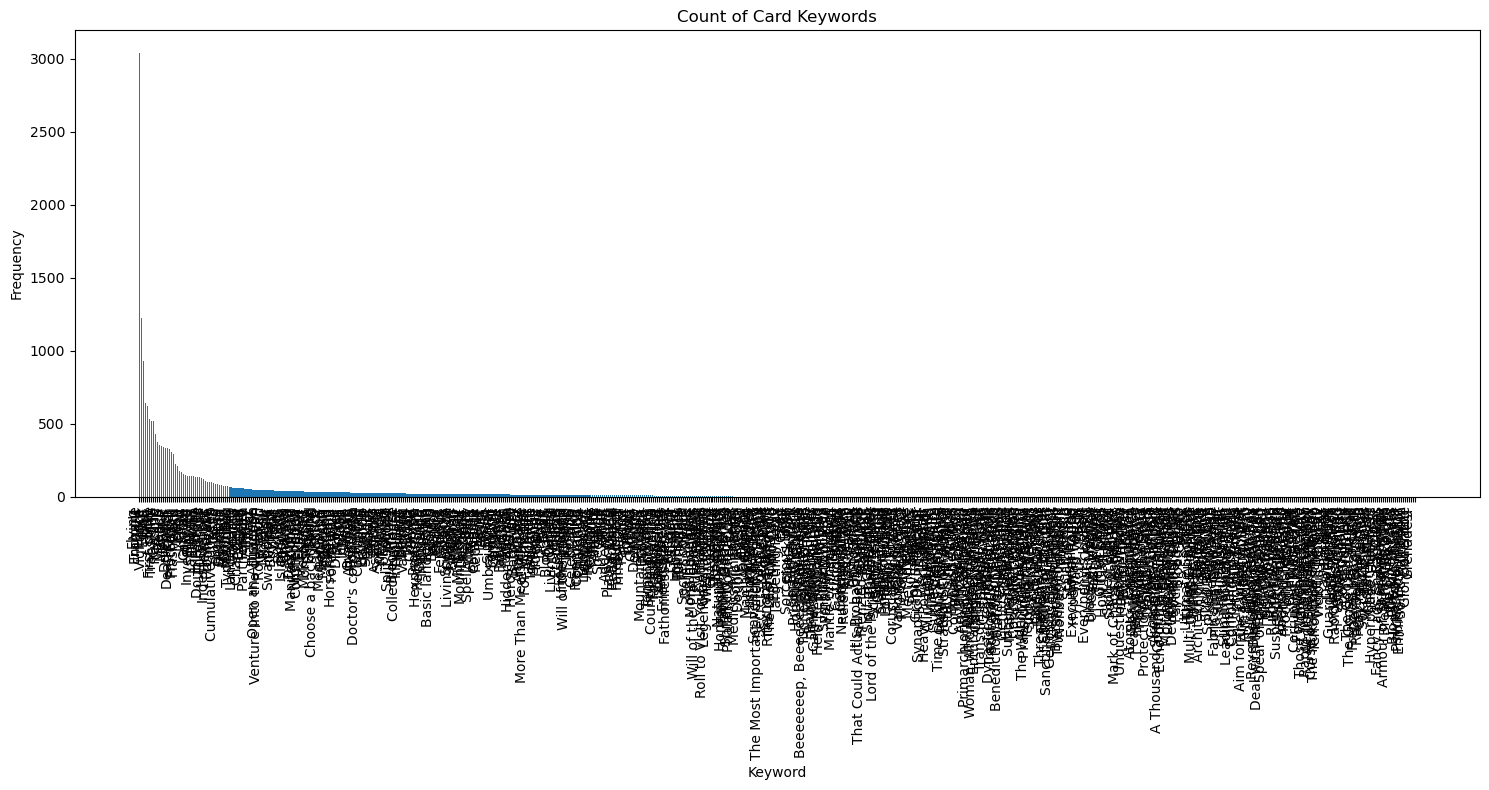

In [23]:
# Plot the keyword frequency

# Sort keywords by frequency in descending order and get top 20
hist_keywords = dict(sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)[:])

# Create bar plot
plt.figure(figsize=(15,8))
plt.bar(hist_keywords.keys(), hist_keywords.values())
plt.xticks(rotation=90, ha='right')
plt.title('Count of Card Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.tight_layout()

There are a ton of cards that are singleton keywords!  I'm not certain we want those in the dataset.  They're just so random given that they are from the MTG Beyond universe where they take 3rd party IPs and make MTG cards out of them.  Universes are from: Warhammer 40k, Dr. Who, Assasins Creed, The Walking Dead, Stranger Things, Fortnite, Street Fighter, Transformers, LoTR... the list goes on...

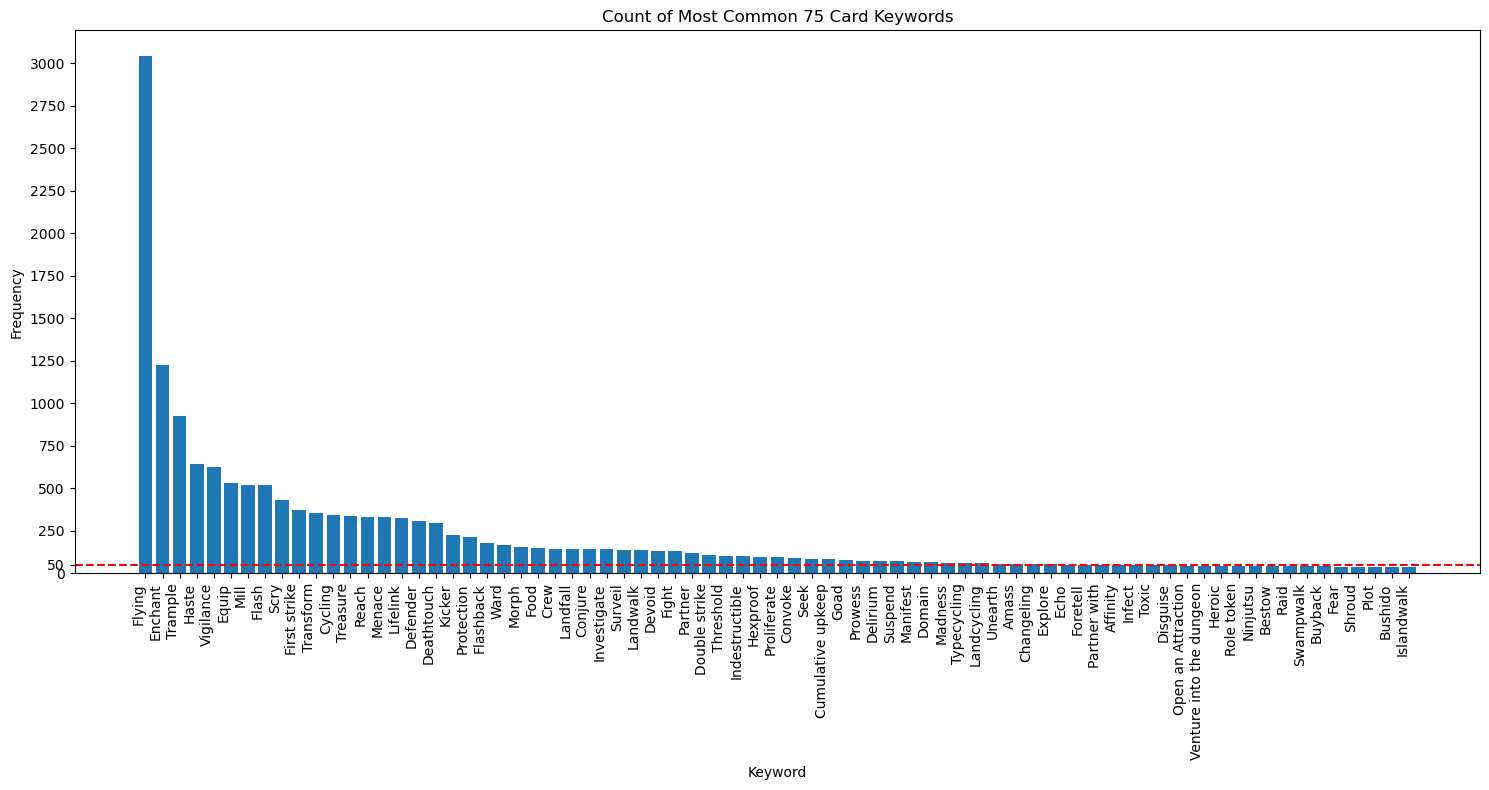

In [41]:
# What do the most common 75 keywords look like?

# Sort keywords by frequency in descending order and get top 75 (for better visualization)
top20_hist_keywords = dict(sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)[:75])

# Create bar plot
plt.figure(figsize=(15,8))
plt.bar(top20_hist_keywords.keys(), top20_hist_keywords.values())
plt.xticks(rotation=90, ha='right')
plt.title('Count of Most Common 75 Card Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.yticks([0, 50] + list(range(250, int(plt.ylim()[1]), 250)))
plt.axhline(y=50, color='r', linestyle='--')
plt.tight_layout()

In [25]:
# Reduce the dataset by removing cards that contain keywords that appear only once throughout all of MTG.

# Get list of keywords that appear only once
single_occurrence_keywords = [k for k,v in keyword_freq.items() if v == 1]

# Create mask for rows that don't contain any of the single occurrence keywords
mask = ~selected_df['keywords'].apply(lambda x: any(kw in x for kw in single_occurrence_keywords))

# Filter dataframe using mask
selected_df_reducedKW = selected_df[mask]

In [39]:
single_occurrence_keywords

['Shrieking Gargoyles',
 'Phalanx Commander',
 'Feed',
 'Friends',
 'Medicus Ministorum',
 'Sonic Booster',
 'Double agenda',
 'Disarm',
 'Detonate',
 'Avoidance',
 "Mama's Coming",
 'Alluring Eyes',
 'History Teacher',
 'Keen Sight',
 'Scavenge the Dead',
 'The Most Important Punch in History',
 'Wild Shape',
 'Secrets of the Soul',
 'Leap Strike',
 'Rope Dart',
 'Synapse Creature',
 'Rites of Banishment',
 'The Last Centurion',
 'Wild Card',
 'ED-E My Love',
 'Targeting Relay',
 'Sec',
 'Caan',
 'Jast',
 'Thay',
 'Sorcerous Elixir',
 'Check Map',
 'Pick a Perk',
 'Sort Inventory',
 'Prismatic Gallery',
 'Horrific Symbiosis',
 'Sonic Blaster',
 'Beeeeeeep, Beeeeeeep, Beeeeeeep',
 'Eternity Gate',
 'Tunnel Snakes Rule!',
 'Blood Chalice',
 'Midnight Entity',
 'Rapacious Hunger',
 'Devouring Monster',
 'Gather Your Courage',
 'Run and Hide',
 'Field Reprogramming',
 'Allons-y!',
 'Timey-Wimey',
 'Symphony of Pain',
 'Parallel Universe',
 'Martyrdom',
 'Mantle of Inspiration',
 'Science'

In [26]:
selected_df_reducedKW

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,[G],[Landfall],NaN,NaN,NaN
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,[U],[Enchant],49283.0,NaN,NaN
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,[G],[Entwine],77122.0,NaN,NaN
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,[U],[Flying],22609.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33826,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
33827,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
33828,"Toralf, God of Fury // Toralf's Hammer",NaN,Legendary Creature — God // Legendary Artifact...,NaN,NaN,NaN,NaN,"[Trample, Equip]",87643.0,NaN,NaN
33829,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN


In [27]:
# Check to see if the length has reduced
len(selected_df_reducedKW)

33557

In [28]:
# Look at the Throne of the Emperor: id 21914 again to see if it has been removed.
# selected_df_reducedKW.loc[21914] # This card has been removed
selected_df_reducedKW.loc[21915] # This card remains, though it is a double-faced card with Etali, Primal Conqueror being the front face.
                                #This is different than a card with a sorcery/instant on the same front face.

name           Etali, Primal Sickness // Etali, Primal Sickness
mana_cost                                                   NaN
type_line                                          Card // Card
oracle_text                                                 NaN
power                                                       NaN
toughness                                                   NaN
colors                                                      NaN
keywords                                                     []
mtgo_id                                                     NaN
loyalty                                                     NaN
defense                                                     NaN
Name: 21915, dtype: object

In [29]:
# Reindex the dataframe
reindex_selected_df = selected_df_reducedKW.reset_index(drop=True)
reindex_selected_df

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,[G],[Landfall],NaN,NaN,NaN
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,[U],[Enchant],49283.0,NaN,NaN
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,[G],[Entwine],77122.0,NaN,NaN
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,[U],[Flying],22609.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33552,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
33553,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
33554,"Toralf, God of Fury // Toralf's Hammer",NaN,Legendary Creature — God // Legendary Artifact...,NaN,NaN,NaN,NaN,"[Trample, Equip]",87643.0,NaN,NaN
33555,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN


Cards that are transform (having a front and back) seem to be having issues within the database.  See Etali [original id 21915] and Toralf, God of Fury (reindex id 33554).

I'm going to check how many of the `* // *` cards exist and possibly just remove them from the dataset.

In [30]:
# Find cards with '//' in their names
double_faced_cards = reindex_selected_df[reindex_selected_df['name'].str.contains('//', na=False)]

# Print the count and the names
print(f"Number of cards with '//' in their names: {len(double_faced_cards)}")
print("\nCards with '//' in their names:")

# Get card names and indices
card_data = [(idx, name) for idx, name in zip(double_faced_cards.index, double_faced_cards['name'])]

# Print cards and their indices in the reindex_selected_df
print(f"Double-Faced Cards ({len(card_data)} total):")
print("-" * 40)
for idx, name in card_data:
    print(f"{idx}. {name}")
print("-" * 40)


Number of cards with '//' in their names: 2510

Cards with '//' in their names:
Double-Faced Cards (2510 total):
----------------------------------------
28. Gigantosaurus // Gigantosaurus
33. Gleeful Demolition // Gleeful Demolition
44. Tatsunari, Toad Rider // Tatsunari, Toad Rider
62. Professor of Zoomancy // Professor of Zoomancy
129. Purple Worm // Purple Worm
135. Prismari Campus // Prismari Campus
153. Thopter Mechanic // Thopter Mechanic
155. Halo Fountain // Halo Fountain
173. Parasitic Grasp // Parasitic Grasp
203. Brave the Wilds // Brave the Wilds
223. Exterminator Magmarch // Exterminator Magmarch
269. Foraging Squirrels // Foraging Squirrels (cont'd)
276. Angel // Demon
290. Wish // Wish
293. Aether Refinery // Aether Refinery
297. Undergrowth Stadium // Undergrowth Stadium
328. Inga Rune-Eyes // Inga Rune-Eyes
338. Bloodletter of Aclazotz // Bloodletter of Aclazotz
345. Sylvan Scavenging // Sylvan Scavenging
349. Ulvenwald Captive // Ulvenwald Abomination
363. Deflecting

There are only 2510 cards that have this double sided feature, lets drop them.

In [31]:
# Remove the double faced cards here

print(f"Old dataset size: {len(reindex_selected_df)}")

# Filter out double-faced cards
reindex_selected_df = reindex_selected_df[~reindex_selected_df['name'].str.contains('//', na=False)].reset_index(drop=True)

# Verify removal
print(f"New dataset size: {len(reindex_selected_df)}")
print(f"Number of rows removed: {len(double_faced_cards)}")

Old dataset size: 33557
New dataset size: 31047
Number of rows removed: 2510


In [32]:
# Reindex the dataframe again
reindex_selected_df = reindex_selected_df.reset_index(drop=True)
reindex_selected_df.tail(5)

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
31042,Devoted Hero,{W},Creature — Elf Soldier,,1,2,[W],[],NaN,NaN,NaN
31043,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
31044,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
31045,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN
31046,Sinew Sliver,{1}{W},Creature — Sliver,All Sliver creatures get +1/+1.,1,1,[W],[],114015.0,NaN,NaN


Read out the current scrubbed data.

In [99]:
reindex_selected_df.to_csv('../data/interim/mtg_carddata_semiscrubbed.csv', index=False)

## Starting from mtg_carddata_semiscrubbed_1-30-25.csv

In [36]:
# Create dictionaries for frequencies and locations
keyword_freq_cleaned = {}
keyword_locations_cleaned = {}

# Count frequencies and store locations
for idx, row in reindex_selected_df.iterrows():
    for keyword in row['keywords']:
        # Update frequency count
        keyword_freq_cleaned[keyword] = keyword_freq_cleaned.get(keyword, 0) + 1
        # Store location
        if keyword in keyword_locations_cleaned:
            keyword_locations_cleaned[keyword].append(idx)
        else:
            keyword_locations_cleaned[keyword] = [idx]

# Sort by frequency (highest to lowest)
sorted_keywords_cleaned = dict(sorted(keyword_freq_cleaned.items(), key=lambda x: x[1], reverse=True))

# Print results with both frequency and locations
print(f"Number of unique keywords: {len(sorted_keywords_cleaned)}")
print("\nKeyword frequencies and locations:")
for keyword, freq in sorted_keywords_cleaned.items():
    print(f"{keyword}: appears {freq} times in rows {keyword_locations_cleaned[keyword]}")

Number of unique keywords: 291

Keyword frequencies and locations:
Flying: appears 2884 times in rows [4, 11, 16, 17, 33, 58, 75, 76, 78, 82, 93, 111, 116, 134, 143, 153, 158, 159, 171, 175, 184, 203, 250, 258, 260, 266, 288, 296, 302, 314, 338, 363, 371, 389, 396, 398, 435, 449, 455, 473, 489, 493, 507, 512, 532, 552, 571, 580, 582, 584, 585, 587, 593, 596, 600, 622, 629, 639, 640, 660, 671, 673, 677, 679, 715, 717, 718, 727, 737, 742, 769, 775, 780, 787, 794, 795, 796, 800, 810, 812, 815, 825, 851, 855, 859, 862, 865, 869, 879, 885, 903, 908, 916, 979, 987, 989, 997, 1002, 1014, 1016, 1018, 1056, 1057, 1088, 1093, 1094, 1096, 1099, 1104, 1150, 1152, 1153, 1163, 1188, 1204, 1215, 1220, 1251, 1267, 1273, 1279, 1290, 1328, 1329, 1337, 1367, 1378, 1381, 1386, 1411, 1415, 1424, 1433, 1439, 1444, 1467, 1477, 1478, 1486, 1487, 1508, 1552, 1562, 1566, 1574, 1589, 1601, 1605, 1632, 1641, 1651, 1652, 1653, 1657, 1659, 1661, 1667, 1693, 1700, 1704, 1714, 1721, 1726, 1735, 1737, 1741, 1758, 1760

Somehow Body Thief and Daybound got through the last filter... I'll remove them here.

In [42]:
# Create mask for rows to drop
rows_to_drop = [12267, 28013]

# Drop the specified rows and reset the index
reindex_selected_df = reindex_selected_df.drop(rows_to_drop).reset_index(drop=True)

In [43]:
# Create dictionaries for frequencies and locations
keyword_freq_cleaned = {}
keyword_locations_cleaned = {}

# Count frequencies and store locations
for idx, row in reindex_selected_df.iterrows():
    for keyword in row['keywords']:
        # Update frequency count
        keyword_freq_cleaned[keyword] = keyword_freq_cleaned.get(keyword, 0) + 1
        # Store location
        if keyword in keyword_locations_cleaned:
            keyword_locations_cleaned[keyword].append(idx)
        else:
            keyword_locations_cleaned[keyword] = [idx]

# Sort by frequency (highest to lowest)
sorted_keywords_cleaned = dict(sorted(keyword_freq_cleaned.items(), key=lambda x: x[1], reverse=True))

# Print results with both frequency and locations
print(f"Number of unique keywords: {len(sorted_keywords_cleaned)}")
print("\nKeyword frequencies and locations:")
for keyword, freq in sorted_keywords_cleaned.items():
    print(f"{keyword}: appears {freq} times in rows {keyword_locations_cleaned[keyword]}")

Number of unique keywords: 289

Keyword frequencies and locations:
Flying: appears 2884 times in rows [4, 11, 16, 17, 33, 58, 75, 76, 78, 82, 93, 111, 116, 134, 143, 153, 158, 159, 171, 175, 184, 203, 250, 258, 260, 266, 288, 296, 302, 314, 338, 363, 371, 389, 396, 398, 435, 449, 455, 473, 489, 493, 507, 512, 532, 552, 571, 580, 582, 584, 585, 587, 593, 596, 600, 622, 629, 639, 640, 660, 671, 673, 677, 679, 715, 717, 718, 727, 737, 742, 769, 775, 780, 787, 794, 795, 796, 800, 810, 812, 815, 825, 851, 855, 859, 862, 865, 869, 879, 885, 903, 908, 916, 979, 987, 989, 997, 1002, 1014, 1016, 1018, 1056, 1057, 1088, 1093, 1094, 1096, 1099, 1104, 1150, 1152, 1153, 1163, 1188, 1204, 1215, 1220, 1251, 1267, 1273, 1279, 1290, 1328, 1329, 1337, 1367, 1378, 1381, 1386, 1411, 1415, 1424, 1433, 1439, 1444, 1467, 1477, 1478, 1486, 1487, 1508, 1552, 1562, 1566, 1574, 1589, 1601, 1605, 1632, 1641, 1651, 1652, 1653, 1657, 1659, 1661, 1667, 1693, 1700, 1704, 1714, 1721, 1726, 1735, 1737, 1741, 1758, 1760

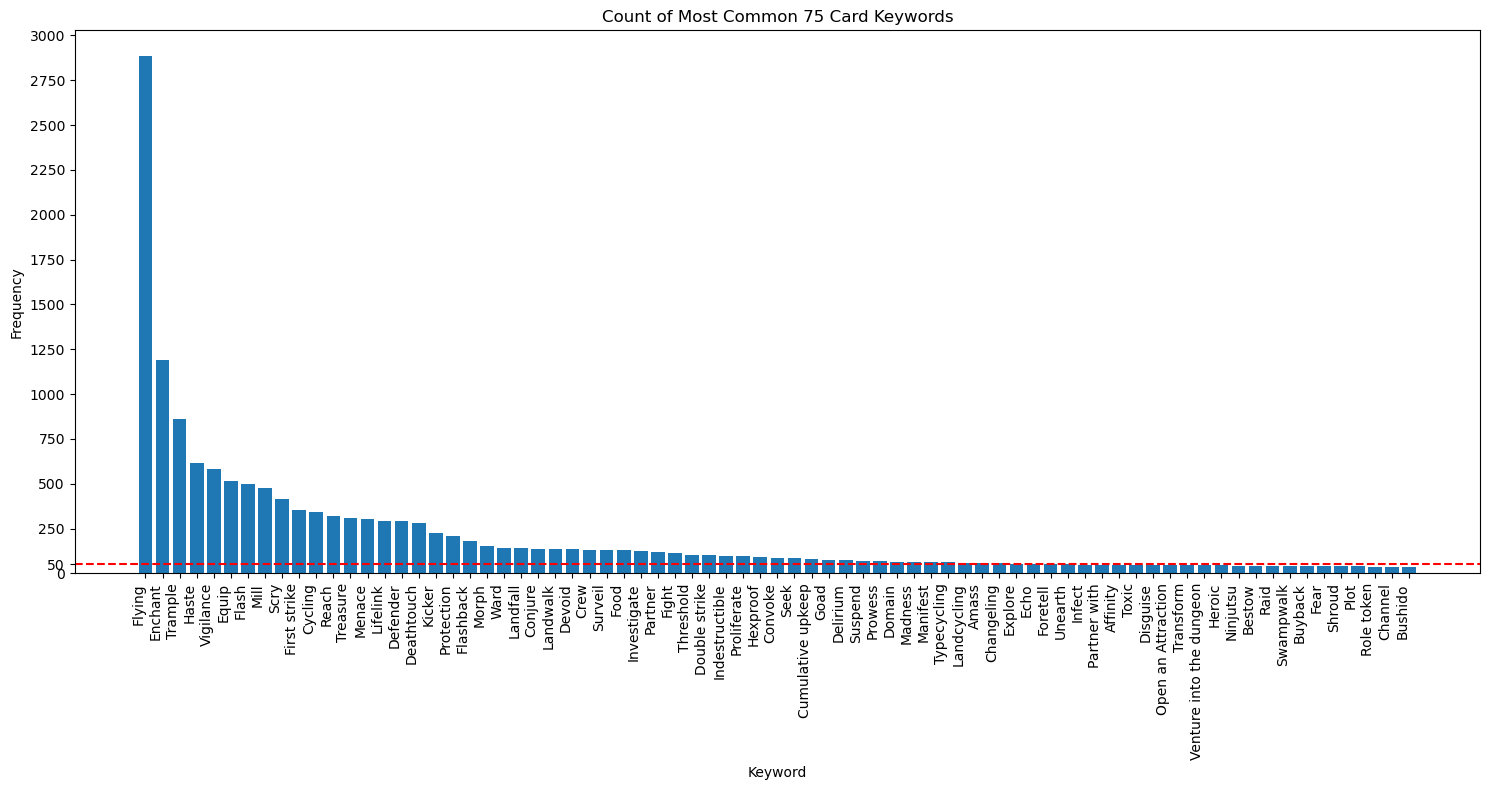

In [44]:
# What do the most common 75 keywords look like?

# Sort keywords by frequency in descending order and get top 75 (for better visualization)
top20_hist_keywords = dict(sorted(keyword_freq_cleaned.items(), key=lambda x: x[1], reverse=True)[:75])

# Create bar plot
plt.figure(figsize=(15,8))
plt.bar(top20_hist_keywords.keys(), top20_hist_keywords.values())
plt.xticks(rotation=90, ha='right')
plt.title('Count of Most Common 75 Card Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.yticks([0, 50] + list(range(250, int(plt.ylim()[1]), 250)))
plt.axhline(y=50, color='r', linestyle='--')
plt.tight_layout()

### DO WE NEED ANY ADDITIONAL CLEANING OF REMOVING CARDS?

IF SO PUT THAT HERE!

In [45]:
reindex_selected_df

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,[G],[Landfall],NaN,NaN,NaN
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,[U],[Enchant],49283.0,NaN,NaN
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,[G],[Entwine],77122.0,NaN,NaN
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,[U],[Flying],22609.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31040,Devoted Hero,{W},Creature — Elf Soldier,,1,2,[W],[],NaN,NaN,NaN
31041,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,[B],[Cycling],64646.0,NaN,NaN
31042,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"[R, W]",[],101914.0,NaN,NaN
31043,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"[G, R]",[],64772.0,4,NaN


In [48]:
reindex_selected_df.to_csv('../data/processed/mtg_carddata_scrubbed.csv', index=False)

In [46]:
df = reindex_selected_df

# REGEX and text analysis columns to pull out some items for possible tokenization

The idea here is that the `type_line` column is normally `type - description`.  This means those two items can be broken up.

Additionally, `keywords` from the keyword column often appear in the `oracle_text` as well.  We need to determine what to do with the oracle_text.

The `mana` cost area is always broken up by `{}` so we can regext all of that per token.

## Quick Load Data

In [ ]:
# If you have the mtg_carddata_scrubbed.csv file, you can skip the above steps and load the file here.

df = pd.read_csv('./tcg_generator/data_git/mtg_carddata_scrubbed.csv')

## Unique patters and regex matching

In [ ]:
# Use regex to find all bracketed values in mana_cost column and extract unique ones

# Get all bracketed values from mana_cost column
mana_patterns = []
for cost in df['mana_cost'].dropna():
    # Find all patterns within curly braces
    brackets = re.findall(r'\{[^}]+\}', cost)
    mana_patterns.extend(brackets)

# Get unique patterns sorted alphabetically
unique_mana_patterns = sorted(list(set(mana_patterns)))

# Print results
print(f"Number of unique mana patterns: {len(unique_mana_patterns)}")
print("\nUnique mana patterns:")
for pattern in unique_mana_patterns:
    print(pattern)

Number of unique mana patterns: 60

Unique mana patterns:
{0}
{1000000}
{10}
{11}
{12}
{13}
{14}
{15}
{16}
{1}
{2/B}
{2/G}
{2/R}
{2/U}
{2/W}
{2}
{3}
{4}
{5}
{6}
{7}
{8}
{9}
{B/G}
{B/P}
{B/R}
{B}
{C/B}
{C/G}
{C/P}
{C/R}
{C/U}
{C/W}
{C}
{D}
{G/P}
{G/U/P}
{G/U}
{G/W/P}
{G/W}
{G}
{HW}
{R/G/P}
{R/G}
{R/P}
{R/W/P}
{R/W}
{R}
{S}
{U/B}
{U/P}
{U/R}
{U}
{W/B}
{W/P}
{W/U}
{W}
{X}
{Y}
{Z}


In [ ]:
# This Lazav has oracle text which references it as both "Lazav, Wearer of Faces" and "Lazav".
df[df["name"] == "Lazav, Wearer of Faces"]

                        name mana_cost  ... loyalty defense
9486  Lazav, Wearer of Faces    {U}{B}  ...     NaN     NaN

[1 rows x 11 columns]


Did we want to remove Gleemax, the card with a mana cost of 1000000?

In [ ]:
# Possible Tokenization of Oracle Text

def substitute_card_names(card_name, text):
    text = text.replace(card_name, "<name>")
    name_pieces = card_name.split(",")
    if len(name_pieces) > 1:
        main_name = name_pieces[0]
        text = text.replace(main_name, "<name>")

    return text


def preprocess_oracle_text(text):
    if pd.isna(text):
        return ""

    # Keep newlines as separate tokens
    text = text.replace('\n', ' \\n ')  # I don't think we need to capture all escape characters, just \n

    # Add spaces around mana symbols and other special patterns
    text = re.sub(r'(\{[^}]+\})', r' \1 ', text)  # Mana symbols like {G}, {2}, {U}
    text = re.sub(r'(−\d+)', r' \1 ', text)  # Planeswalker minus abilities
    text = re.sub(r'([.,:])', r' \1 ', text)  # Keep punctuation as separate tokens

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

def mtg_tokenize(text):
    # Pattern matches:
    # 1. Escape sequences (\n)
    # 2. Mana symbols {X}, {R}, {2}, etc.
    # 3. Minus abilities for planeswalkers (−1, −2, etc.)
    # 4. Words (including hyphenated)
    # 5. Numbers
    # 6. Punctuation
    pattern = r'\\n|{[^}]+}|−\d+|[<>\w\'-]+|\d+|[.,:]'
    tokens = re.findall(pattern, text)
    return tokens

# Example usage:
example = df['oracle_text'].iloc[9486]
example_name = df["name"].iloc[9486]
example = substitute_card_names(example_name, example)
processed = preprocess_oracle_text(example)
tokens = mtg_tokenize(processed)
print("Original:", example)
print("\nProcessed:", processed)
print("\nTokens:", tokens)

# ====
example = df['oracle_text'].iloc[0]
example_name = df["name"].iloc[0]
example = substitute_card_names(example_name, example)
processed = preprocess_oracle_text(example)
tokens = mtg_tokenize(processed)
print("\n\nOriginal:", example)
print("\nProcessed:", processed)
print("\nTokens:", tokens)

Original: Whenever <name> attacks, exile target card from a graveyard, then investigate. (Create a Clue token. It's an artifact with "{2}, Sacrifice this artifact: Draw a card.")
Whenever you sacrifice a Clue, you may have <name> become a copy of a creature card exiled with it until end of turn.

Processed: Whenever <name> attacks , exile target card from a graveyard , then investigate . (Create a Clue token . It's an artifact with " {2} , Sacrifice this artifact : Draw a card . ") \n Whenever you sacrifice a Clue , you may have <name> become a copy of a creature card exiled with it until end of turn .

Tokens: ['Whenever', '<name>', 'attacks', ',', 'exile', 'target', 'card', 'from', 'a', 'graveyard', ',', 'then', 'investigate', '.', 'Create', 'a', 'Clue', 'token', '.', "It's", 'an', 'artifact', 'with', '{2}', ',', 'Sacrifice', 'this', 'artifact', ':', 'Draw', 'a', 'card', '.', '\\n', 'Whenever', 'you', 'sacrifice', 'a', 'Clue', ',', 'you', 'may', 'have', '<name>', 'become', 'a', 'copy

## Tokenize Texts

In [ ]:
# Now let's preprocess and tokenize all oracle texts
df["oracle_text"].fillna("", inplace=True)

# Replace all name instances with <name> token
df["oracle_text"] = df.apply(lambda card: substitute_card_names(card["name"], card["oracle_text"]), axis=1)

# First, preprocess all oracle texts
processed_texts = df['oracle_text'].fillna('').apply(preprocess_oracle_text)

# Then tokenize all processed texts
tokenized_texts = processed_texts.apply(mtg_tokenize)

# Convert to a list if needed
tokenized_list = tokenized_texts.tolist()

# Print a few examples to verify
print("First 3 tokenized texts:")
for i in range(3):
    print(f"\nText {i}:")
    print(tokenized_list[i])

First 3 tokenized texts:

Text 0:
['Landfall', 'Whenever', 'a', 'land', 'you', 'control', 'enters', ',', 'you', 'get', '{E}', '{E}', 'two', 'energy', 'counters', '.', '\\n', 'You', 'may', 'pay', 'eight', '{E}', 'rather', 'than', 'pay', 'the', 'mana', 'cost', 'for', 'permanent', 'spells', 'you', 'cast', '.']

Text 1:
['As', 'long', 'as', 'name', 'is', 'untapped', ',', 'players', "can't", 'untap', 'more', 'than', 'two', 'permanents', 'during', 'their', 'untap', 'steps', '.']

Text 2:
['Enchant', 'creature', '\\n', 'Enchanted', 'creature', 'gets', '-3', '-0', '.']


In [ ]:
df['tokenized_text'] = tokenized_texts
print(df)

                           name  ...                                     tokenized_text
0      Nissa, Worldsoul Speaker  ...  [Landfall, Whenever, a, land, you, control, en...
1                    Static Orb  ...  [As, long, as, name, is, untapped, ,, players,...
2           Sensory Deprivation  ...  [Enchant, creature, \n, Enchanted, creature, g...
3                Road of Return  ...  [Choose, one, \n, Return, target, permanent, c...
4                    Storm Crow  ...  [Flying, This, creature, can't, be, blocked, e...
...                         ...  ...                                                ...
31040              Devoted Hero  ...                                                 []
31041          Without Weakness  ...  [Target, creature, you, control, gains, indest...
31042   Firesong and Sunspeaker  ...  [Red, instant, and, sorcery, spells, you, cont...
31043         Samut, the Tested  ...  [1, :, Up, to, one, target, creature, gains, d...
31044              Sinew Sliver 

In [ ]:
# Get all unique tokens across all tokenized texts
unique_tokens = set()
for tokens in df['tokenized_text']:
    unique_tokens.update(tokens)

# Convert to sorted list for better readability
unique_tokens_list = sorted(list(unique_tokens))

# Print the count and the tokens
print(f"Number of unique tokens: {len(unique_tokens_list)}")
print("\nUnique tokens:")
for token in unique_tokens_list:
    print(token)

Number of unique tokens: 5820

Unique tokens:
'
'00
'96
'97
'98
'99
'Aaah
'Derm
'Fires
'This
'When
'You
's
'stache
,
-
-0
-1
-10
-11
-13
-2
-3
-4
-5
-6
-7
-X
-Y
-x
.
0
0-1
000
1
1-10
1-2
1-3
1-4
1-5
1-6
1-7
1-9
10
10-19
10-digit
100
11
11-20
111
12
12-0
120
13
130
14
15
15-20
16
17
17th
18-year-old
19
19-year-old
1993
1994
1997
1998
1999
19½
1½
2
2-3
2-4
2-5
2-6
20
20-sided
200
2000
2001
2002-2003
2004
2023
2024
22-year-old
23
24
25
25th
26
26th
27th
29
2K2
2d4
2s
2½
3
3-7
30
31
36
360
3s
3½
4
4-2
4-6
4-7
40
5
5-1
50
6
6-0
6-11
60
6th
7
7-14
702
704
7th
8
87
9
:
A
A1
A2
A3
ACTION
AK
AK-Go
AND
Abbey
Aberrant
Abilities
Abomination
Abrupt
Academy
Accept
Accumulated
Accursed
Acererak
Acha
Acid
Aclazotz
Action
Activate
Activated
Adamant
Adapt
Add
Addendum
Additional
Adjacent
Adjudicators
Admiral
Advantage
Adventure
Adventurer
Adventurous
Advisor
Advisors
Advocate
Aeo
Aeronaut
Aetherborn
Aetherjet
Affinity
Affinitycycling
Afflict
Afflicted
After
Afterlife
Against
Agents
Aggressive
Aisha
Ajan

In [9]:
from nltk.probability import FreqDist
from collections import Counter

# Flatten all tokens into a single list
all_tokens = [token for tokens in df['tokenized_text'] for token in tokens if token]

# Calculate frequency distribution
freq_dist = FreqDist(all_tokens)

# Get the 20 most common tokens
most_common = freq_dist.most_common(50)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in most_common], [x[1] for x in most_common])
plt.xticks(rotation=45, ha='right')
plt.title('50 Most Common Tokens in Card Text')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.tight_layout()

# Print statistics
print(f"Total tokens: {len(all_tokens)}")
print(f"Unique tokens: {len(set(all_tokens))}")
print("\nMost common tokens:")
for token, count in most_common:
    print(f"{token}: {count}")

Total tokens: 974703
Unique tokens: 5820

Most common tokens:
.: 66307
,: 41854
a: 26524
\n: 25415
creature: 24155
you: 22559
name: 20096
of: 19717
the: 18384
1: 16540
your: 14513
to: 14187
card: 13018
:: 11840
this: 11276
it: 11200
target: 10808
control: 10627
or: 10068
turn: 9719
and: 9710
that: 7606
on: 7306
with: 7202
may: 7054
Whenever: 6967
enters: 6926
end: 6826
When: 6652
from: 6412
damage: 6050
2: 5965
each: 5937
cast: 5935
an: 5822
until: 5644
player: 5628
cards: 5488
{T}: 5383
put: 5319
spell: 5295
as: 4941
for: 4934
its: 4748
creatures: 4673
You: 4623
hand: 4616
If: 4568
graveyard: 4413
counter: 4400


# TF-IDF
Probably won't need this in the future given that we'll be decoder-only and using attention, but I was curious.

In [10]:
# Try to get some information about the tokens relating to the cards using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokenized lists to strings for TfidfVectorizer
# Join tokens with spaces to create document strings
tokenized_docs = [' '.join(tokens) for tokens in df['tokenized_text']]

# Create and fit TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the texts to TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(tokenized_docs)

# Get feature names (tokens)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame for easier viewing
# This is more helpful as you can see how the tokens are associated with the values
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names,
    index=df.index
)

# Add the TF-IDF matrix as a new column in the original dataframe
df['tfidf_vector'] = list(tfidf_matrix.toarray()) # This isn't that helpful given that the matrix is sparse and you lose which token is associated with which value... but it's a start

# Print some basic information
print(f"Number of documents: {tfidf_matrix.shape[0]}")
print(f"Vocabulary size: {len(feature_names)}")
print("\nFirst few feature names:")
print(feature_names[:10])


Number of documents: 31045
Vocabulary size: 14176

First few feature names:
['00' '000' '10' '100' '101' '11' '111' '12' '120' '13']


In [15]:
# Check the TF-IDF values for a specific card (Nissa, Worldsoul Speaker)
tfidf_df['landfall']# Nissa, Worldsould Speaker has 'landfall' and she triggers on this

0        0.300367
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
31040    0.000000
31041    0.000000
31042    0.000000
31043    0.000000
31044    0.000000
Name: landfall, Length: 31045, dtype: float64

In [22]:
tfidf_df # This is helpful to see the values associated with the tokens; cards are at the same index as the values in df

,00,000,10,100,101,11,111,12,120,13,...,zubera,zulaport,zuo,zur,zuran,zurgo,zyym,éomer,éowyn,šlemr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df # tfidf_vector column is the same as the tfidf_df but without the feature_names

,name,mana_cost,type_line,oracle_text,power,toughness,colors,keywords,mtgo_id,loyalty,defense,tokenized_text,tfidf_vector
0,"Nissa, Worldsoul Speaker",{3}{G},Legendary Creature — Elf Druid,"Landfall — Whenever a land you control enters,...",3,3,['G'],['Landfall'],NaN,NaN,NaN,"[Landfall, Whenever, a, land, you, control, en...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Static Orb,{3},Artifact,"As long as Static Orb is untapped, players can...",NaN,NaN,[],[],15870.0,NaN,NaN,"[As, long, as, Static, Orb, is, untapped, ,, p...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Sensory Deprivation,{U},Enchantment — Aura,Enchant creature\nEnchanted creature gets -3/-0.,NaN,NaN,['U'],['Enchant'],49283.0,NaN,NaN,"[Enchant, creature, \n, Enchanted, creature, g...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Road of Return,{G}{G},Sorcery,Choose one —\n• Return target permanent card f...,NaN,NaN,['G'],['Entwine'],77122.0,NaN,NaN,"[Choose, one, \n, Return, target, permanent, c...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Storm Crow,{1}{U},Creature — Bird,Flying (This creature can't be blocked except ...,1,2,['U'],['Flying'],22609.0,NaN,NaN,"[Flying, This, creature, can't, be, blocked, e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31040,Devoted Hero,{W},Creature — Elf Soldier,NaN,1,2,['W'],[],NaN,NaN,NaN,[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
31041,Without Weakness,{1}{B},Instant,Target creature you control gains indestructib...,NaN,NaN,['B'],['Cycling'],64646.0,NaN,NaN,"[Target, creature, you, control, gains, indest...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
31042,Firesong and Sunspeaker,{4}{R}{W},Legendary Creature — Minotaur Cleric,Red instant and sorcery spells you control hav...,4,6,"['R', 'W']",[],101914.0,NaN,NaN,"[Red, instant, and, sorcery, spells, you, cont...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
31043,"Samut, the Tested",{2}{R}{G},Legendary Planeswalker — Samut,+1: Up to one target creature gains double str...,NaN,NaN,"['G', 'R']",[],64772.0,4,NaN,"[1, :, Up, to, one, target, creature, gains, d...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
